In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns


In [4]:
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(['RowNumber'], axis=1)

In [105]:
churn_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


''

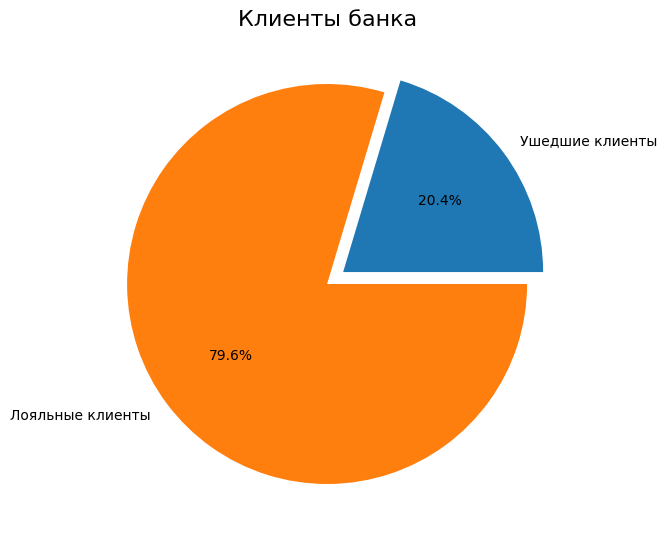

In [5]:

# Задание №9.1.
churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 'Ушедший' if x == 1 else 'Лояльный') # Переименовал
departed_client = churn_data[churn_data['Exited'] == 'Ушедший']['Exited'].count() # количество ушедших клиентов
loyal_customer = churn_data[churn_data['Exited'] == 'Лояльный']['Exited'].count() # количество лояльных клиентов
clients = [departed_client,loyal_customer]
labels1 = 'Ушедшие клиенты', 'Лояльные клиенты'
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    clients,
    labels = labels1,
    autopct='%.1f%%',
    explode = [0.1, 0]
)
axes.set_title('Клиенты банка', fontsize=16)
;


Лояльных клиентов - 79.6%, это больше, чем ушедших клиентов почти в 4 раза.

In [107]:
# Задание №9.2.
Balance=churn_data[churn_data['Balance'] > 2500] # фильтрация по балансу клиента
fig = px.histogram(
    Balance,
    x='Balance',
    labels={'Balance':'Баланс на счету клиента, $', 'count' :'Количество клиентов, чел.'},
    marginal='box',
    nbins=30,
    title='Распределение баланса пользователей, у которых на счету больше 2 500 долларов'
)
fig 


Большая часть клиентов имеет на своём балансе от 100 175$ до 139 520$
Максимальный баланс на счету клиента 250 898$
Медиана 119 839$

In [7]:
fig = px.histogram(
    churn_data,
    x='Exited',
    y='Balance',
    
    labels={'Balance':'Баланс на счету клиента, $', 'Exited' :'Количество клиентов, чел.'},
    marginal='box',
    nbins=30,
    title='Распределение баланса пользователей, у которых на счету больше 2 500 долларов'
)
fig 

In [108]:
# Задание №9.3.
fig = plotly.express.box(data_frame=churn_data, x='Exited', y = 'Balance', title='Баланс на накопительном счёте ушедших и лояльных клиентов',points='all', labels={'Balance':'Баланс на счету клиента, $', 'Exited' : 'Клиенты'} )
fig

У лояльных клиентов наблюдается баланс равный нулю, в отличии от ушедших клиентов.Возможно банк берёт высокую комиссию за хранение денежных средств на счетах клиентов. В связи с этим часть лояльных клиентов не хранит денежные средства в банке и возможно в дальнейшем закроет свой счёт.

In [109]:
# Задание №9.4.
departed_client = churn_data[churn_data['Exited'] == 'Ушедший'] # фильтрация по лояльности клиента
fig = px.histogram(
    departed_client ,
    x='Age',
    labels={'Age':'Возраст клиента', 'count' :'Количество клиентов, чел.'},
    marginal='box',
    nbins=30,
    title='Распределение возраста в разрезе признака оттока'
)
fig 

Клиенты в возрасте от 38 до 51 года чаще всего прекращают сотрудничество с банком. Больше всего необходимо обратить внимание на группу клиентов в возрасте  45-49 лет.

In [110]:
# Задание №9.5.
fig = px.scatter_3d(
    data_frame=churn_data, #датафрейм 
    x = 'CreditScore', 
    y = 'EstimatedSalary', 
    z = 'Exited',
    color='Exited',#расцветка в зависимости от лояльности клиента
    labels={'CreditScore':'Кредитный рейтинг', 'EstimatedSalary' :'Зарплата', 'Exited': 'Статус клиента'},
    log_x=True, 
    log_y=True,
    width=1000,
    height=700
)

fig.show()


Согласно графика у ушедших клиентов рейтинг опускается ниже 400 в отличие от лояльных клиентов. Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты отсутствует

''

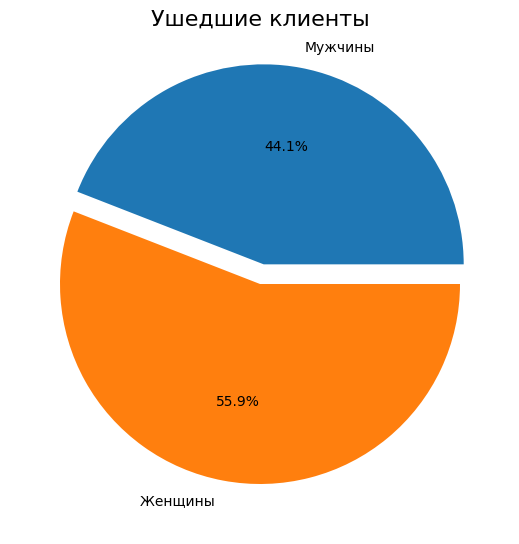

In [111]:
# Задание №9.6.

departed_client = churn_data[churn_data['Exited'] == 'Ушедший'] # фильтрация по лояльности клиентов
Female=departed_client[departed_client['Gender'] == 'Female']['Gender'].count() # количество женщин
Male=departed_client[departed_client['Gender'] == 'Male']['Gender'].count() # количество мужчин

clients = [ Male, Female,]
labels1 = 'Мужчины','Женщины '
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    clients,
    labels = labels1,
    autopct='%.1f%%',
    explode = [0.1, 0]
)
axes.set_title('Ушедшие клиенты', fontsize=16)
;



Женщины чаще всего отказываются от услуг банка 

''

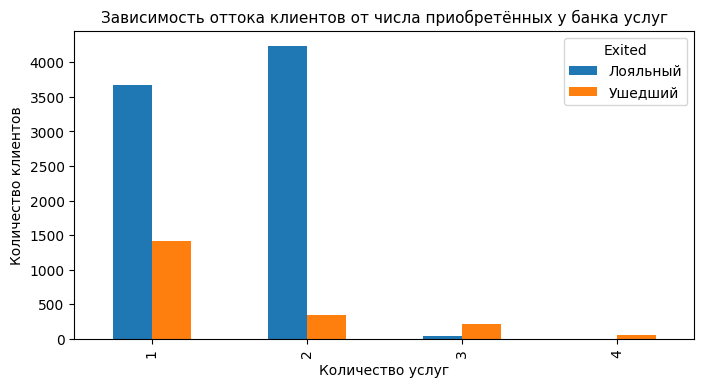

In [112]:
# Задание №9.7.

pivot= churn_data.pivot_table(
    'CustomerId',
    index='NumOfProducts',
    columns='Exited',
    aggfunc='count'
)
pivot = pivot.fillna(0)

fig, axes = plt.subplots(figsize=(8, 4))
pivot.plot(
    kind='bar',
    ax=axes
    
)
axes.set_title('Зависимость оттока клиентов от числа приобретённых у банка услуг', fontsize=11)
axes.set_xlabel('Количество услуг')
axes.set_ylabel('Количество клиентов')

;




На график видно, что лояльные клиенты чаще покупают 1-2 услуги, чем ушедшие клиенты. Ушедшие клиенты чаще, чем лояльные, покупали 3-4 услуги.

''

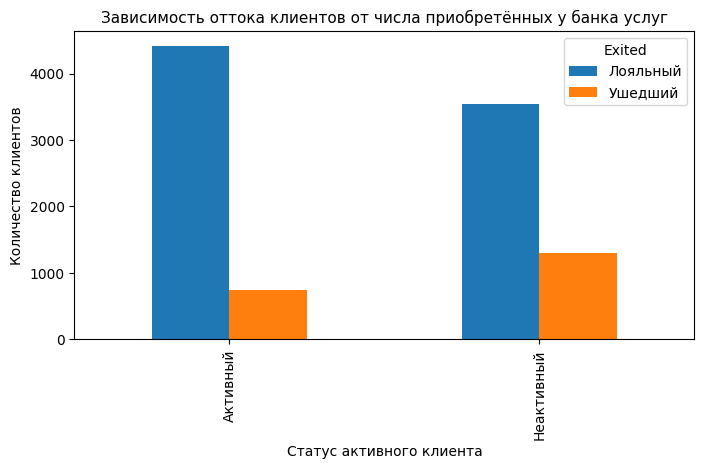

In [113]:
# Задание №9.8.
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].apply(lambda x: 'Активный' if x == 1 else 'Неактивный') # Переименовал
pivot= churn_data.pivot_table(
    'CustomerId',
    index='IsActiveMember',
    columns='Exited',
    aggfunc='count'
)
pivot = pivot.fillna(0)

fig, axes = plt.subplots(figsize=(8, 4))
pivot.plot(
    kind='bar',
    ax=axes
    
)
axes.set_title('Зависимость оттока клиентов от числа приобретённых у банка услуг', fontsize=11)
axes.set_xlabel('Статус активного клиента')
axes.set_ylabel('Количество клиентов')

;

Клиенты со статусом "Активный" меньше отказывались от услуг банка,чем клиент со статусом "Неактивный". Необходимо клиентов со статусом "Неактивный" завлекать различными акциями, персональными условиями, чтобы клиенты меньше отказывались от банковских услуг.

In [114]:
# Задание №9.9.
churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 1 if x == 'Ушедший' else 0) # Переименовал
churn_countryes = churn_data.groupby(['Geography'])[['Exited']].mean() * 100

fig = px.choropleth(
    data_frame = churn_countryes,
    locations = churn_countryes.index, 
    locationmode = "country names",
    color= 'Exited',
    animation_frame="Exited", 
    range_color=[0, 35], 
    title='Зависимость оттока клиентов от географического расположения',
    width=800, 
    height=500,
    color_continuous_scale='Reds'
)

fig.show()

Доля ушедших клиентов больше всего в Германии.Показатель почти в два раза больше,чем в других странах. Возможно банковских отделений в Германии мало и клиентам неудобно обращаться в банк.Возможно в Германии существуют банки с более лояльными условиями, чтобы понять,нужно изучить конкурентов этого банка в Германии

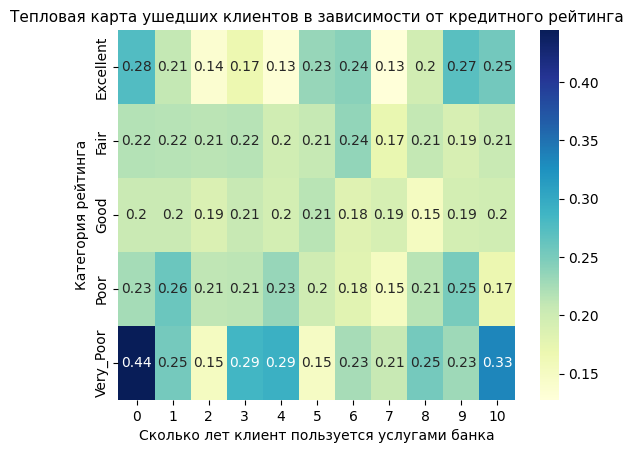

In [115]:
# Задание №9.9.
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat']= churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data['CreditScoreCat'] = churn_data['CreditScoreCat'] .astype('category')

pivot=churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu', annot= True)
heatmap.set_title('Тепловая карта ушедших клиентов в зависимости от кредитного рейтинга', fontsize=11)
heatmap.set_xlabel('Сколько лет клиент пользуется услугами банка');
heatmap.set_ylabel('Категория рейтинга');

Уходят чаще всего клиенты c рейтингом в категории 'Very_Poor'